# 자료 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
folder = 'C:\\Users\\ACEIT\\Documents\\DSS\\Project\\Instacart\\'

#### train, test order set 구분을 위해 orders.csv 파일을 가져온다

In [3]:
orders = pd.read_csv(folder + 'orders\\orders.csv', dtype={
        'order_id': np.int32,
        'user_id': np.int32,
        'eval_set': 'category',
        'order_number': np.int16,
        'order_dow': np.int8,
        'order_hour_of_day': np.int8,
        'days_since_prior_order': np.float32})

In [4]:
orders.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [5]:
test_order = orders[orders['eval_set']=='test']

#### Train Data을 가져온다. Train_data는 다른 파일에서 미리 작업해서 가져온 Template 파일이다
 * train_data1 = User가 과거에 구매했던 Product 리스트들을 후보군으로 정함
 * train_data2 = Order의 DOW에 가장 많이 팔리는 Product 리스트들을 후보군으로 정함
 * train_data3 = User의 Segment마다 가장 많이 팔리는 Product 리스트를 후보군으로 정함

In [6]:
train_data1 = pd.read_csv('C:\\Users\\ACEIT\\Documents\\DSS\\Project\\Instacart\\lgbexample_trainX.csv',
                         dtype = {
                             'order_id': np.int32,
                             'product_id': np.uint16,
                             'user_total_orders': np.uint16,
                             'user_total_items' : np.uint16,
                             'total_distinct_items' : np.uint16,
                             'user_average_days_orders' : np.float16,
                             'user_average_basket': np.float32,
                             'order_hour_of_day' : np.uint16,
                             'days_since_prior_order': np.float16,
                             'product_orders': np.int32,
                             'product_reorders': np.int32,
                             'UP_orders': np.uint16,
                             'UP_orders_since_last': np.int16,
                             'UP_delta_hour_vs_last': np.int16,
                             'train_y': np.int16             
                         })

# 무거운 Data를 불러올 때 Pandas는 각 자료가 어떤 type인지 분석하는데 자원을 많이 사용한다.
# 따라서 가능하면 d-type을 지정해 주는 것이 좋으며, type을 정할 때 아래 링크 참고할 것
# https://msdn.microsoft.com/ko-kr/library/s3f49ktz.aspx

In [7]:
train_data1.shape

(8474661, 23)

In [8]:
train_data1.head()

,Unnamed: 0,order_id,product_id,user_total_orders,user_total_items,total_distinct_items,user_average_days_between_orders,user_average_basket,order_hour_of_day,days_since_prior_order,...,product_orders,product_reorders,product_reorder_rate,UP_orders,UP_orders_ratio,UP_average_pos_in_cart,UP_reorder_rate,UP_orders_since_last,UP_delta_hour_vs_last,train_y
0,0,1187899,17122,11,59,18,19.0,5.363636,8,14.0,...,13880,9377,0.675576,1,0.090909,6.0,0.090909,6,7,0
1,1,1187899,196,11,59,18,19.0,5.363636,8,14.0,...,35791,27791,0.776480,10,0.909091,1.4,0.909091,1,0,1
2,2,1187899,26405,11,59,18,19.0,5.363636,8,14.0,...,1214,536,0.441516,2,0.181818,5.0,0.181818,7,1,1
3,3,1187899,46149,11,59,18,19.0,5.363636,8,14.0,...,8558,6953,0.812456,3,0.272727,3.0,0.272727,1,0,1
4,4,1187899,14084,11,59,18,19.0,5.363636,8,14.0,...,15935,12923,0.810982,1,0.090909,2.0,0.090909,10,0,0


In [9]:
train_data1.columns

Index(['Unnamed: 0', 'order_id', 'product_id', 'user_total_orders',
       'user_total_items', 'total_distinct_items',
       'user_average_days_between_orders', 'user_average_basket',
       'order_hour_of_day', 'days_since_prior_order', 'days_since_ratio',
       'aisle_id', 'department_id', 'product_orders', 'product_reorders',
       'product_reorder_rate', 'UP_orders', 'UP_orders_ratio',
       'UP_average_pos_in_cart', 'UP_reorder_rate', 'UP_orders_since_last',
       'UP_delta_hour_vs_last', 'train_y'],
      dtype='object')

In [10]:
train_data1.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
train_data1.set_index(['order_id','product_id'], inplace=True)

In [12]:
train_data1.head()

user_total_orders  user_total_items  \
order_id product_id                                        
1187899  17122                      11                59   
         196                        11                59   
         26405                      11                59   
         46149                      11                59   
         14084                      11                59   

                     total_distinct_items  user_average_days_between_orders  \
order_id product_id                                                           
1187899  17122                         18                              19.0   
         196                           18                              19.0   
         26405                         18                              19.0   
         46149                         18                              19.0   
         14084                         18                              19.0   

                     user_average_basket  order_hour_of_day  \
order_id product_id                                           
1187899  17122                  5.363636                  8   
         196                    5.363636                  8   
         26405                  5.363636                  8   
         46149                  5.363636                  8   
         14084                  5.363636                  8   

                     days_since_prior_order  days_since_ratio  aisle_id  \
order_id product_id                                                       
1187899  17122                         14.0          0.736842        24   
         196                           14.0          0.736842        77   
         26405                         14.0          0.736842        54   
         46149                         14.0          0.736842        77   
         14084                         14.0          0.736842        91   

                     department_id  product_orders  product_reorders  \
order_id product_id                                                    
1187899  17122                   4           13880              9377   
         196                     7           35791             27791   
         26405                  17            1214               536   
         46149                   7            8558              6953   
         14084                  16           15935             12923   

                     product_reorder_rate  UP_orders  UP_orders_ratio  \
order_id product_id                                                     
1187899  17122                   0.675576          1         0.090909   
         196                     0.776480         10         0.909091   
         26405                   0.441516          2         0.181818   
         46149                   0.812456          3         0.272727   
         14084                   0.810982          1         0.090909   

                     UP_average_pos_in_cart  UP_reorder_rate  \
order_id product_id                                            
1187899  17122                          6.0         0.090909   
         196                            1.4         0.909091   
         26405                          5.0         0.181818   
         46149                          3.0         0.272727   
         14084                          2.0         0.090909   

                     UP_orders_since_last  UP_delta_hour_vs_last  train_y  
order_id product_id                                                        
1187899  17122                          6                      7        0  
         196                            1                      0        1  
         26405                          7                      1        1  
         46149                          1                      0        1  
         14084                         10                      0        0

#### 우리가 사용하는 모든 모델이 다 똑똑한 것은 아니다.
#### SVM이나 RandomForest같이 늙은 모델들은 우리가 NAN값을 따로 처리해주어야 한다.
#### Days_Since_Ratio만 Nan값이 존재한다

In [14]:
train_data1.isnull().any()
#Days Since Ration = days_since_prior_order / user_average_days_between_orders
#따라서 평균으로 채워주자

user_total_orders                   False
user_total_items                    False
total_distinct_items                False
user_average_days_between_orders    False
user_average_basket                 False
order_hour_of_day                   False
days_since_prior_order              False
days_since_ratio                     True
aisle_id                            False
department_id                       False
product_orders                      False
product_reorders                    False
product_reorder_rate                False
UP_orders                           False
UP_orders_ratio                     False
UP_average_pos_in_cart              False
UP_reorder_rate                     False
UP_orders_since_last                False
UP_delta_hour_vs_last               False
train_y                             False
dtype: bool

In [19]:
train_data1['days_since_ratio'] = train_data1['days_since_ratio'].fillna(train_data1['days_since_ratio'].mean())

In [20]:
train_data1.isnull().any()

user_total_orders                   False
user_total_items                    False
total_distinct_items                False
user_average_days_between_orders    False
user_average_basket                 False
order_hour_of_day                   False
days_since_prior_order              False
days_since_ratio                    False
aisle_id                            False
department_id                       False
product_orders                      False
product_reorders                    False
product_reorder_rate                False
UP_orders                           False
UP_orders_ratio                     False
UP_average_pos_in_cart              False
UP_reorder_rate                     False
UP_orders_since_last                False
UP_delta_hour_vs_last               False
train_y                             False
dtype: bool

#### train_data1의 후보군은 총 8,474,661개 였는데, 이 중에서 9.7%만 Training Set에서 실제로 구매되었다.

In [21]:
train_data1.groupby('train_y').size()

train_y
0    7645837
1     828824
dtype: int64

In [22]:
train_data1.shape

(8474661, 20)

In [23]:
#Order_Products_Train 파일을 가져와보자
train_order = pd.read_csv(folder + 'order_products__train\\order_products__train.csv')

In [24]:
#실제 Train Set에 있는 Row눈 1,384,617개다
train_order.shape

(1384617, 4)

#### 우리가 갖고 있던 후보군으로 맞출 수 있었던 제품은 60%밖에 안된다. 
#### 즉, 구매 제품의 40% 정도는 기존 구매 제품 리스트를 후보군으로 하여 예측할 수 없다

In [107]:
828824/1384617

0.5985944127509629

In [108]:
# Validation을 하려면,,,
# 먼저 불러들어온 train_set을 나누고, 이 validation set을 갖고 predict를 해본다.
# Threshold를 통해서 1로 나온 order_id와 product_id를 따로 빼놔야 한다.
#Validatin의 order_id를 가져와 train_product 파일에서 실제 (order_id product_id)의 리스트, 튜플, df...뭐든 만든 다음에


## Package Import 및 Model별 Hyperparameter 지정해주기

In [25]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 반드시 모델 돌리기 전에 아래 f_to_use와 Parameter 확인할 것

In [26]:
f_to_use_1 = ['user_total_orders', 'user_total_items',
       'total_distinct_items', 'user_average_days_between_orders',
       'user_average_basket', 'order_hour_of_day', 'days_since_prior_order',
       'days_since_ratio', 'aisle_id', 'department_id', 'product_orders',
       'product_reorders', 'product_reorder_rate', 'UP_orders',
       'UP_orders_ratio', 'UP_average_pos_in_cart', 'UP_reorder_rate',
       'UP_orders_since_last', 'UP_delta_hour_vs_last']

In [27]:
# lightgbm setting

lgb_categorical = ['order_hour_of_day']
# lightgbm setting
lgb_categorical = [   ]
lgb_train_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'num_leaves': 96,
    'max_depth': 10,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.95,
    'bagging_freq': 5
}


In [28]:
#XGBoost setting

# XGBoost setting
xgb_train_params = {
    "objective"         : "reg:logistic"
    ,"eval_metric"      : "logloss"
    ,"eta"              : 0.1
    ,"max_depth"        : 15
    ,"min_child_weight" :10
    ,"gamma"            :0.70
    ,"subsample"        :0.76
    ,"colsample_bytree" :0.95
    ,"alpha"            :2e-05
    ,"lambda"           :10
}

In [29]:
class Train():
    def __init__(self, train_data):
        #self.features = features
        self.target = train_data['train_y']
        self.data = train_data.drop(['train_y'], axis = 1)
           
        
    def split(self, test_size = 0.25):
        self.test_size = test_size
        #features = self.features
        self.x_train, self.x_val, self.y_train, self.y_val = train_test_split(self.data, self.target,test_size = self.test_size )
        #self.x_train = self.x_train[features]
        #self.x_val = self.x_val[features]
        
    
    def Lightgbm(self, parameter=lgb_train_params, categorical=lgb_categorical):
        self.categorical = categorical
        self.params = parameter
        self.dataset = lgb.Dataset(self.x_train, label = self.y_train, categorical_feature = self.categorical)
        #features = self.features
        del (self.x_train)
        del (self.y_train)
        self.bst = lgb.train(self.params, self.dataset)
        del (self.dataset)
        

        
        
    def XGB(self, parameter = xgb_train_params, boostround = 80):
        self.boostround = boostround
        self.params = parameter
        #features = self.features
        #self.categorical = categorical
        self.dataset = xgb.DMatrix(self.x_train, self.y_train)
        self.x_valDM = xgb.DMatrix(self.x_val)
        del (self.x_train)
        del (self.y_train)
        self.watchlist = [(self.dataset, "train")]
        self.bst = xgb.train(params = self.params, dtrain = self.dataset, num_boost_round = self.boostround,
                            evals = self.watchlist, verbose_eval = 10)
        del (self.dataset)
        
        
    def SVM(self):
        self.clf = svm.SVR()
        #features = self.features
        self.clf.fit(self.data, self.target)
        del (self.x_train)
        del (self.y_train)

        
    def RandomForest(self):
        self.clf = RandomForestClassifier(n_estimators=10)
        #features = self.features
        self.clf.fit(self.data, self.target)
        del (self.x_train)
        del (self.y_train)
   

# Light GBM

#### Model이란 이름으로 Class를 만든 후 Train/Validation Set을 나눈다.

In [116]:
model = Train(train_data1)

In [117]:
model.split()

#### 사용할 Model을 선택하고 학습시킨다.

In [118]:
# 아래 함수를 구현하는 순간 Training이 자동으로 된다. 
model.Lightgbm()

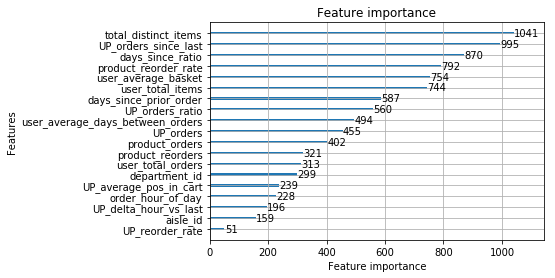

In [119]:
plt.clf()
lgb.plot_importance(model.bst)
plt.show()

#### Validation을 진행한다 

In [120]:
# Split하여 만들어낸 Validation Set을 이용해 예측을 해본다.
val_preds = model.bst.predict(model.x_val)

In [121]:
# Validation Set의 예측값과 실제 값을 같은 DataFrame에 넣는다.
validation = pd.DataFrame(model.x_val)
validation['real_y'] = model.y_val
validation['predicted_y'] = val_preds

In [122]:
validation.head()

,,user_total_orders,user_total_items,total_distinct_items,user_average_days_between_orders,user_average_basket,order_hour_of_day,days_since_prior_order,days_since_ratio,aisle_id,department_id,...,product_reorders,product_reorder_rate,UP_orders,UP_orders_ratio,UP_average_pos_in_cart,UP_reorder_rate,UP_orders_since_last,UP_delta_hour_vs_last,real_y,predicted_y
order_id,product_id,,,,,,,,,,,,,,,,,,,,,
3210471,4642,18,148,57,5.882353,8.222222,23,5.0,0.850000,61,19,...,292,0.669725,1,0.055556,16.0,0.055556,6,5,0,0.041115
3327594,26050,5,68,43,18.750000,13.600000,18,30.0,1.600000,5,13,...,33,0.192982,1,0.200000,8.0,0.200000,4,1,0,0.031021
2789512,38080,39,185,70,9.447369,4.743590,20,2.0,0.211699,17,13,...,7,0.318182,1,0.025641,1.0,0.025641,26,2,0,0.006601
438143,2052,43,900,223,8.547619,20.930233,12,9.0,1.052925,107,19,...,43,0.605634,1,0.023256,17.0,0.023256,41,0,0,0.005740
1661885,4656,11,144,88,18.600000,13.090909,16,8.0,0.430108,88,13,...,4911,0.491641,1,0.090909,8.0,0.090909,10,3,1,0.030811


In [123]:
# 아래와 같이 계산하면 Threshold 값을 어느 정도로 잡아야 할지 파악할 수 있을지도 모른다. 
validation.groupby('real_y')['predicted_y'].mean()

real_y
0    0.078247
1    0.276958
Name: predicted_y, dtype: float64

## Validation 성능을 확인
 * #### Validation에서 중요한 포인트들이 있다.
 * #### 일단 Cross_Validation Method를 사용하지 않은 이유는, 모델의 예측값은 확률값으로 나오는 반면, 실제 y값은 binary라는 점 때문이다. 
 * #### Validation을 하려면 결국 Threshold값을 찾고, 예측 y값을 binrary로 변환해 준 다음에 비교를 해야 하는데, 이렇게 되면 Threshold의 Simulation이 불가능해진다.
 * #### 따라서 Train, Validation Set을 Random하게 나누어서 진행하는 방식을 선택했다.

In [ ]:
# 이번 대회에서는 F1 Score로 순위를 매긴다
# F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score

In [ ]:
for thres in [0.16, 0.20, 0.24, 0.28, 0.32, 0.36]:
    new_col = 'thres_' + str(thres)
    validation[new_col] = (validation['predicted_y'] > threshold).astype(np.int16)
    print ("Threshold: ", new_col, f1_score(y_true = validation.real_y, y_pred = validation[new_col]))
    

In [124]:
# #위에서 나온 값을 확인해보니 Threshold값을 0.28정도로 잡는 것이 무난해 보인다.
# threshold = 0.27
# validation['predicted_y_t0.27'] = (validation['predicted_y'] > threshold).astype(np.int16)

In [125]:
# validation.head()

,,user_total_orders,user_total_items,total_distinct_items,user_average_days_between_orders,user_average_basket,order_hour_of_day,days_since_prior_order,days_since_ratio,aisle_id,department_id,...,product_reorder_rate,UP_orders,UP_orders_ratio,UP_average_pos_in_cart,UP_reorder_rate,UP_orders_since_last,UP_delta_hour_vs_last,real_y,predicted_y,predicted_y_t0.27
order_id,product_id,,,,,,,,,,,,,,,,,,,,,
3210471,4642,18,148,57,5.882353,8.222222,23,5.0,0.850000,61,19,...,0.669725,1,0.055556,16.0,0.055556,6,5,0,0.041115,0
3327594,26050,5,68,43,18.750000,13.600000,18,30.0,1.600000,5,13,...,0.192982,1,0.200000,8.0,0.200000,4,1,0,0.031021,0
2789512,38080,39,185,70,9.447369,4.743590,20,2.0,0.211699,17,13,...,0.318182,1,0.025641,1.0,0.025641,26,2,0,0.006601,0
438143,2052,43,900,223,8.547619,20.930233,12,9.0,1.052925,107,19,...,0.605634,1,0.023256,17.0,0.023256,41,0,0,0.005740,0
1661885,4656,11,144,88,18.600000,13.090909,16,8.0,0.430108,88,13,...,0.491641,1,0.090909,8.0,0.090909,10,3,1,0.030811,0


In [126]:
# f1_score(y_true = validation.real_y, y_pred = validation['predicted_y_t0.27'])

0.43217172005227378

In [127]:
# threshold = 0.33
# validation['predicted_y_t0.33'] = (validation['predicted_y'] > threshold).astype(np.int16)

In [128]:
# f1_score(y_true = validation.real_y, y_pred = validation['predicted_y_t0.33'] )

0.40496232668555115

In [129]:
# threshold = 0.20
# validation['predicted_y_t0.20'] = (validation['predicted_y'] > threshold).astype(np.int16)

In [130]:
# f1_score(y_true = validation.real_y, y_pred = validation['predicted_y_t0.20'])

0.43901319059987581

In [131]:
# threshold = 0.18
# validation['predicted_y_t0.18'] = (validation['predicted_y'] > threshold).astype(np.int16)

In [132]:
# f1_score(y_true = validation.real_y, y_pred = validation['predicted_y_t0.18'])

0.43517986970418626

# XGBM

In [148]:
model = Train(train_data1)

In [149]:
model.split()

In [150]:
model.XGB()

[0]	train-logloss:0.62524
[10]	train-logloss:0.332632
[20]	train-logloss:0.263103
[30]	train-logloss:0.243491
[40]	train-logloss:0.236734
[50]	train-logloss:0.233516
[60]	train-logloss:0.231183
[70]	train-logloss:0.229644
[79]	train-logloss:0.228204


In [152]:
val_preds = model.bst.predict(model.x_valDM)

In [154]:
validation = pd.DataFrame(model.x_val)
validation['real_y'] = model.y_val
validation['predicted_y'] = val_preds

In [155]:
validation.groupby('real_y')['predicted_y'].mean()

real_y
0    0.077685
1    0.281903
Name: predicted_y, dtype: float32

In [156]:
threshold = 0.20
validation['predicted_y_t0.20'] = (validation['predicted_y'] > threshold).astype(np.int16)

In [157]:
f1_score(y_true = validation.real_y, y_pred = validation['predicted_y_t0.20'])

0.4425134329310097

In [158]:
threshold = 0.25
validation['predicted_y_t0.25'] = (validation['predicted_y'] > threshold).astype(np.int16)

In [159]:
f1_score(y_true = validation.real_y, y_pred = validation['predicted_y_t0.25'])

0.44129469600414573

In [160]:
threshold = 0.18
validation['predicted_y_t0.18'] = (validation['predicted_y'] > threshold).astype(np.int16)

In [161]:
f1_score(y_true = validation.real_y, y_pred = validation['predicted_y_t0.18'])

0.43755388070580487

# SVM

In [30]:
model = Train(train_data1)

In [31]:
model.split()

In [ ]:
model.SVM() 

In [ ]:
val_preds = model.bst.predict(model.x_val)

In [ ]:
validation = pd.DataFrame(model.x_val)
validation['real_y'] = model.y_val
validation['predicted_y'] = val_preds

In [ ]:
validation.groupby('real_y')['predicted_y'].mean()

In [ ]:
threshold = 0.33
validation['predicted_y_t0.33'] = (validation['predicted_y'] > threshold).astype(np.int16)

In [ ]:
f1_score(y_true = validation.real_y, y_pred = validation['predicted_y_t0.27'])

# Random Forest

In [166]:
model = Train(train_data1)

In [167]:
model.split()

In [169]:
# model.RandomForest()

In [ ]:
val_preds = model.bst.predict(model.x_val)

In [ ]:
validation = pd.DataFrame(model.x_val)
validation['real_y'] = model.y_val
validation['predicted_y'] = val_preds

In [ ]:
validation.groupby('real_y')['predicted_y'].mean()

In [ ]:
threshold = 0.33
validation['predicted_y_t0.33'] = (validation['predicted_y'] > threshold).astype(np.int16)

In [ ]:
f1_score(y_true = validation.real_y, y_pred = validation['predicted_y_t0.27'])

# 분류모델(lgbm, xgbm...)을 하나 선택한 후 Test Set을 만든다

In [133]:
test_data = pd.read_csv('C:\\Users\\ACEIT\\Documents\\DSS\\Project\\Instacart\\lgbexample_testX.csv',
                         dtype = {
                             'order_id': np.int32,
                             'product_id': np.uint16,
                             'user_total_orders': np.uint16,
                             'user_total_items' : np.uint16,
                             'total_distinct_items' : np.uint16,
                             'user_average_days_orders' : np.float16,
                             'user_average_basket': np.float32,
                             'order_hour_of_day' : np.uint16,
                             'days_since_prior_order': np.float16,
                             'product_orders': np.int32,
                             'product_reorders': np.int32,
                             'UP_orders': np.uint16,
                             'UP_orders_since_last': np.int16,
                             'UP_delta_hour_vs_last': np.int16,        
                         })

In [134]:
test_data.shape

(4833292, 22)

In [135]:
test_data.drop('Unnamed: 0', axis=1, inplace=True)

In [136]:
test_data.set_index(['order_id', 'product_id'], inplace=True)

In [137]:
test_data.head()

user_total_orders  user_total_items  \
order_id product_id                                        
2774568  17668                      13                88   
         44683                      13                88   
         48523                      13                88   
         21903                      13                88   
         14992                      13                88   

                     total_distinct_items  user_average_days_between_orders  \
order_id product_id                                                           
2774568  17668                         33                              12.0   
         44683                         33                              12.0   
         48523                         33                              12.0   
         21903                         33                              12.0   
         14992                         33                              12.0   

                     user_average_basket  order_hour_of_day  \
order_id product_id                                           
2774568  17668                  6.769231                 15   
         44683                  6.769231                 15   
         48523                  6.769231                 15   
         21903                  6.769231                 15   
         14992                  6.769231                 15   

                     days_since_prior_order  days_since_ratio  aisle_id  \
order_id product_id                                                       
2774568  17668                         11.0          0.916667        91   
         44683                         11.0          0.916667        83   
         48523                         11.0          0.916667        37   
         21903                         11.0          0.916667       123   
         14992                         11.0          0.916667        83   

                     department_id  product_orders  product_reorders  \
order_id product_id                                                    
2774568  17668                  16            2110              1220   
         44683                   4           22275             11981   
         48523                   1            5129              2376   
         21903                   4          241921            186884   
         14992                   4           29069             16942   

                     product_reorder_rate  UP_orders  UP_orders_ratio  \
order_id product_id                                                     
2774568  17668                   0.578199          5         0.384615   
         44683                   0.537868          2         0.153846   
         48523                   0.463248          2         0.153846   
         21903                   0.772500          8         0.615385   
         14992                   0.582820          2         0.153846   

                     UP_average_pos_in_cart  UP_reorder_rate  \
order_id product_id                                            
2774568  17668                         3.60         0.384615   
         44683                         9.50         0.153846   
         48523                         6.50         0.153846   
         21903                         4.25         0.615385   
         14992                         7.00         0.153846   

                     UP_orders_since_last  UP_delta_hour_vs_last  
order_id product_id                                               
2774568  17668                          2                      3  
         44683                          7                      1  
         48523                          4                      1  
         21903                          1                      0  
         14992                          6                      0

In [138]:
test_data_D = xgb.DMatrix(test_data)

In [139]:
test_preds = model.bst.predict(test_data)
test_data['preds'] = test_preds
test_data.head()

user_total_orders  user_total_items  \
order_id product_id                                        
2774568  17668                      13                88   
         44683                      13                88   
         48523                      13                88   
         21903                      13                88   
         14992                      13                88   

                     total_distinct_items  user_average_days_between_orders  \
order_id product_id                                                           
2774568  17668                         33                              12.0   
         44683                         33                              12.0   
         48523                         33                              12.0   
         21903                         33                              12.0   
         14992                         33                              12.0   

                     user_average_basket  order_hour_of_day  \
order_id product_id                                           
2774568  17668                  6.769231                 15   
         44683                  6.769231                 15   
         48523                  6.769231                 15   
         21903                  6.769231                 15   
         14992                  6.769231                 15   

                     days_since_prior_order  days_since_ratio  aisle_id  \
order_id product_id                                                       
2774568  17668                         11.0          0.916667        91   
         44683                         11.0          0.916667        83   
         48523                         11.0          0.916667        37   
         21903                         11.0          0.916667       123   
         14992                         11.0          0.916667        83   

                     department_id  product_orders  product_reorders  \
order_id product_id                                                    
2774568  17668                  16            2110              1220   
         44683                   4           22275             11981   
         48523                   1            5129              2376   
         21903                   4          241921            186884   
         14992                   4           29069             16942   

                     product_reorder_rate  UP_orders  UP_orders_ratio  \
order_id product_id                                                     
2774568  17668                   0.578199          5         0.384615   
         44683                   0.537868          2         0.153846   
         48523                   0.463248          2         0.153846   
         21903                   0.772500          8         0.615385   
         14992                   0.582820          2         0.153846   

                     UP_average_pos_in_cart  UP_reorder_rate  \
order_id product_id                                            
2774568  17668                         3.60         0.384615   
         44683                         9.50         0.153846   
         48523                         6.50         0.153846   
         21903                         4.25         0.615385   
         14992                         7.00         0.153846   

                     UP_orders_since_last  UP_delta_hour_vs_last     preds  
order_id product_id                                                         
2774568  17668                          2                      3  0.348864  
         44683                          7                      1  0.064248  
         48523                          4                      1  0.094588  
         21903                          1                      0  0.633335  
         14992                          6                      0  0.079577

In [140]:
test_data.reset_index(inplace=True)

In [141]:
test_data.head()

,order_id,product_id,user_total_orders,user_total_items,total_distinct_items,user_average_days_between_orders,user_average_basket,order_hour_of_day,days_since_prior_order,days_since_ratio,...,product_orders,product_reorders,product_reorder_rate,UP_orders,UP_orders_ratio,UP_average_pos_in_cart,UP_reorder_rate,UP_orders_since_last,UP_delta_hour_vs_last,preds
0,2774568,17668,13,88,33,12.0,6.769231,15,11.0,0.916667,...,2110,1220,0.578199,5,0.384615,3.60,0.384615,2,3,0.348864
1,2774568,44683,13,88,33,12.0,6.769231,15,11.0,0.916667,...,22275,11981,0.537868,2,0.153846,9.50,0.153846,7,1,0.064248
2,2774568,48523,13,88,33,12.0,6.769231,15,11.0,0.916667,...,5129,2376,0.463248,2,0.153846,6.50,0.153846,4,1,0.094588
3,2774568,21903,13,88,33,12.0,6.769231,15,11.0,0.916667,...,241921,186884,0.772500,8,0.615385,4.25,0.615385,1,0,0.633335
4,2774568,14992,13,88,33,12.0,6.769231,15,11.0,0.916667,...,29069,16942,0.582820,2,0.153846,7.00,0.153846,6,0,0.079577


In [142]:
test_data.shape

(4833292, 22)

#### 1차 Model(From Previously Ordered Product List)로 뽑은 Test Order별 Product Set

In [ ]:
# 먼저 '이전구매품목'에서 Threshold값 기준으로 선정한 제품을 Dictionary 형태로 만든다. 

thresholds = 0.2

d = dict()
for row in test_data.itertuples():
    if row.preds > thresholds:
        try:
            d[row.order_id].add(row.product_id)
        except:
            d[row.order_id] = set()
            d[row.order_id].add(row.product_id)

In [ ]:
len(d)

#### Memory를 위해 이미 사용한 모델의 변수들은 다 지워주자

In [40]:
del (validation)
del (val_preds)
del (model)

# 2차 Model 추가

In [ ]:
# Train test template 1을 참고

In [39]:
train_data2 = pd.read_csv('C:\\Users\\ACEIT\\Documents\\DSS\\Project\\Instacart\\lgbexample_trainX_3.csv',
                         dtype = {
                             'order_id': np.int32,
                             'product_id': np.uint16,
                             'user_total_orders': np.uint16,
                             'user_total_items' : np.uint16,
                             'total_distinct_items' : np.uint16,
                             'user_average_days_orders' : np.float16,
                             'user_average_basket': np.float32,
                             'order_hour_of_day' : np.uint16,
                             'days_since_prior_order': np.float16,
                             'product_orders': np.int32,
                             'product_reorders': np.int32,          
                             'train_y': np.int16             
                         })

In [ ]:
train_data2.shape

In [ ]:
train_data2.head()

In [ ]:
train_data2.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
train_data2.set_index(['order_id', 'product_id'], inplace=True)

In [ ]:
train_data2.head(2)

In [ ]:
model = Train(train_data2)

In [ ]:
model.split()

In [ ]:
model.XGB()

In [ ]:
plt.clf()
xgb.plot_importance(model.bst)
plt.show()

In [ ]:
val_preds = model.bst.predict(model.x_valDM)

In [ ]:
val_preds.shape

In [ ]:
model.x_val.shape

In [ ]:
validation2 = pd.DataFrame(model.x_val)
validation2['real_y'] = model.y_val
validation2['predicted_y'] = val_preds

In [ ]:
validation2.groupby('real_y').size()

In [ ]:
validation2.groupby('real_y')['predicted_y'].mean()

In [ ]:
threshold = 0.3
validation2['predicted_y_thres_0.04'] = (validation2['predicted_y'] > 0.3).astype(np.int16)

In [ ]:
f1_score(y_true = validation2['real_y'], y_pred = validation2['predicted_y_thres_0.04'])

## Model2의 Test Set 가져오기

In [ ]:
test_data2 = pd.read_csv('C:\\Users\\ACEIT\\Documents\\DSS\\Project\\Instacart\\lgbexample_testX_3.csv',
                         dtype = {
                             'order_id': np.int32,
                             'product_id': np.uint16,
                             'user_total_orders': np.uint16,
                             'user_total_items' : np.uint16,
                             'total_distinct_items' : np.uint16,
                             'user_average_days_orders' : np.float16,
                             'user_average_basket': np.float32,
                             'order_hour_of_day' : np.uint16,
                             'days_since_prior_order': np.float16,
                             'product_orders': np.int32,
                             'product_reorders': np.int32,      
                         })

In [116]:
test_data2.shape

In [124]:
test_data2.head(2)

In [125]:
test_data2.drop('Unnamed: 0', axis=1, inplace=True)

{'a': {3425, '3425'}, 'b': set(), 'c': set()}

In [ ]:
train_data2.set_index(['order_id', 'product_id'], inplace=True)

In [ ]:
test_data_D2 = xgb.DMatrix(test_data2)

In [ ]:
test_preds2 = model.bst.predict(test_data_D2)
test_data2['preds'] = test_preds2
test_data2.head()

In [ ]:
test_data2.reset_index(inplace=True)

In [ ]:
test_data2.shape

In [ ]:
test_data2.head

#### 2차 Model(From No Previous Order History Product List)로 뽑은 Test Order별 Product Set을 "추가"

In [ ]:
len(d)

In [ ]:
# 'Model2(신규품목)에서 Threshold값 기준으로 선정한 제품을 기존의 Dictionary에 추가한다.

thresholds = 0.3

for row in test_data2.itertuples():
    if row.preds > thresholds:
        try:
            d[row.order_id].add(row.product_id)
        except:
            d[row.order_id] = set()
            d[row.order_id].add(row.product_id)
            #print ("Something went wrong at ", row.order_id)

In [ ]:
# 원칙적으로 아래 코드는 d(len)과 똑같은 74129개를 만들어야 한다. 
d2 = dict()
for i in d.keys():
    for j in d[i]:
        try: 
            d2[i] += ' ' + str(j)
        except:
            d2[i] = str(j)
        

In [ ]:
len(d2) #OK Check

In [ ]:
for order in test_order.order_id:
    if order not in d2:
        d2[order] = 'None'

In [ ]:
len(d2) # Must Be 75,000

In [ ]:
submission = pd.DataFrame.from_dict(d2, orient='index')

In [ ]:
submission.shape

In [ ]:
submission.reset_index(inplace=True)
submission.columns = ['order_id', 'products']

In [ ]:
submission.to_csv('C:\\Users\\ACEIT\\Documents\\DSS\\Project\\Instacart\\submission2.csv', index=False)

In [ ]:
# 그냥 단순하게 '신규'로 자주 구매되는 제품 리스트를 만든 후,
# User cluster 값 추가
# Order cluster 값 추가
# 그런 다음 각 order_id에다가 자주 추가되는 제품 100개 정도만 다 갖다 붙인다.
# 그리고 training set에 있냐 없냐로 1, 0
# 학습
# 똑같이 진행